<a href="https://colab.research.google.com/github/Yesi0/Hipotesis-exito-streams-spotify-/blob/main/Hito2_yesenia_quiroz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import shapiro


In [ ]:
pd.read_csv('tablas_unidas.csv')

,track_id,track_name,artist_name,artist_count,release_date,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,cuartiles_speech,cuartiles_bpm,cat_dance,cat_valance,cat_energy,cat_acoustic,cat_instrumental,cat_live,cat_speech,cat_bpm
0,1593131,Beautiful Girl,Luciano,1,2022-04-22,710,4,160035717,16,11,...,3,3,Alto,Alto,Bajo,Alto,Bajo,Bajo,Alto,Alto
1,6363032,Calm Down,R,1,2022-02-09,4013,10,445763624,107,44,...,2,2,Alto,Alto,Alto,Alto,Bajo,Bajo,Bajo,Bajo
2,4342968,Crazy What Love Can Do,"David Guetta, Ella Henderson, Becky Hill",3,2022-03-18,5290,0,286739476,139,73,...,1,3,Bajo,Bajo,Alto,Bajo,Bajo,Alto,Bajo,Alto
3,2761463,Down Under (feat. Colin Hay),"Luude, Colin Hay",2,2021-11-19,3541,2,252871192,57,13,...,4,4,Bajo,Bajo,Alto,Bajo,Alto,Alto,Alto,Alto
4,6250958,Have You Ever Seen The Rain,Creedence Clearwater Revival,1,1968-07-01,15890,14,1145727611,71,37,...,1,2,Alto,Alto,Alto,Bajo,Bajo,Alto,Bajo,Bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,8725160,Love Nwantiti - Remix,"Ckay, AX'EL, Dj Yo!",3,2019-08-30,2696,0,540539717,42,2,...,2,2,Bajo,Bajo,Bajo,Alto,Alto,Bajo,Bajo,Bajo
944,7587856,Say You Won't Let Go,James Arthur,1,2016-09-09,15722,16,2420461338,231,37,...,2,1,Bajo,Bajo,Bajo,Alto,Bajo,Bajo,Bajo,Bajo
945,4611820,Special,SZA,1,2022-12-09,906,0,88092256,6,21,...,2,1,Bajo,Bajo,Bajo,Alto,Bajo,Bajo,Bajo,Bajo
946,3557036,The Business,Ti,1,2020-01-01,14311,0,1062345656,255,32,...,4,2,Alto,Bajo,Bajo,Alto,Alto,Bajo,Alto,Bajo


In [ ]:
datos = pd.read_csv('tablas_unidas.csv')
datos.head()

,track_id,track_name,artist_name,artist_count,release_date,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,cuartiles_speech,cuartiles_bpm,cat_dance,cat_valance,cat_energy,cat_acoustic,cat_instrumental,cat_live,cat_speech,cat_bpm
0,1593131,Beautiful Girl,Luciano,1,2022-04-22,710,4,160035717,16,11,...,3,3,Alto,Alto,Bajo,Alto,Bajo,Bajo,Alto,Alto
1,6363032,Calm Down,R,1,2022-02-09,4013,10,445763624,107,44,...,2,2,Alto,Alto,Alto,Alto,Bajo,Bajo,Bajo,Bajo
2,4342968,Crazy What Love Can Do,"David Guetta, Ella Henderson, Becky Hill",3,2022-03-18,5290,0,286739476,139,73,...,1,3,Bajo,Bajo,Alto,Bajo,Bajo,Alto,Bajo,Alto
3,2761463,Down Under (feat. Colin Hay),"Luude, Colin Hay",2,2021-11-19,3541,2,252871192,57,13,...,4,4,Bajo,Bajo,Alto,Bajo,Alto,Alto,Alto,Alto
4,6250958,Have You Ever Seen The Rain,Creedence Clearwater Revival,1,1968-07-01,15890,14,1145727611,71,37,...,1,2,Alto,Alto,Alto,Bajo,Bajo,Alto,Bajo,Bajo


In [ ]:
datos.shape

(948, 37)

In [ ]:
datos.describe()

,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,bpm,danceability__,...,speechiness__,total_playlist_participation,cuartiles_dance,cuartiles_valance,cuartiles_energy,cuartiles_acoustic,cuartiles_instrumental,cuartiles_live,cuartiles_speech,cuartiles_bpm
count,948.000000,948.000000,948.000000,9.480000e+02,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,...,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000
mean,1.559072,5204.276371,12.053797,5.140022e+08,67.556962,51.969409,386.255274,2.632911,122.473629,66.966245,...,10.155063,5658.088608,2.498945,2.493671,2.497890,2.502110,2.497890,2.495781,2.498945,2.495781
std,0.894481,7915.307049,19.611061,5.679220e+08,86.332110,50.694669,1133.383186,5.980102,28.047409,14.644716,...,9.932943,8935.152266,1.118624,1.119550,1.121451,1.120509,1.119566,1.119560,1.120510,1.119560
min,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,...,2.000000,34.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,874.500000,0.000000,1.411439e+08,13.000000,7.000000,13.000000,0.000000,99.000000,57.000000,...,4.000000,914.500000,1.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,2197.500000,3.000000,2.876903e+08,34.000000,38.000000,44.000000,0.000000,120.500000,69.000000,...,6.000000,2302.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000
75%,2.000000,5503.750000,16.000000,6.729425e+08,86.250000,87.000000,163.250000,2.000000,140.000000,78.000000,...,11.000000,5791.750000,3.250000,3.000000,4.000000,4.000000,3.250000,3.000000,4.000000,3.000000
max,8.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,12367.000000,58.000000,206.000000,96.000000,...,64.000000,62623.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   track_id                      948 non-null    object
 1   track_name                    946 non-null    object
 2   artist_name                   948 non-null    object
 3   artist_count                  948 non-null    int64 
 4   release_date                  948 non-null    object
 5   in_spotify_playlists          948 non-null    int64 
 6   in_spotify_charts             948 non-null    int64 
 7   streams                       948 non-null    int64 
 8   in_apple_playlists            948 non-null    int64 
 9   in_apple_charts               948 non-null    int64 
 10  in_deezer_playlists           948 non-null    int64 
 11  in_deezer_charts              948 non-null    int64 
 12  bpm                           948 non-null    int64 
 13  danceability__      

In [ ]:
# Paso 3: Extracción de grupos de datos
# Separar los datos en dos grupos por característica musical (Alto y Bajo).

# Identificar las columnas de categorías de interés
feature_columns = [col for col in datos.columns if col.startswith('cat_')] #se crea una lista y seleccionar solo aquellas que comienzan con 'cat_',

# Calcular los promedios de streams para cada grupo.

# Crear un diccionario para almacenar los promedios de cada grupo para cada característica
averages_by_group = {}

# Iterar a través de las columnas de características y separar los datos en grupos Alto y Bajo
stream_column = 'streams'
for feature in feature_columns:
    high_group = datos[datos[feature] == 'Alto'][stream_column] #aplicando un filtro al DataFrame. El filtro datos[feature] == 'Alto' crea una serie de valores booleanos (True o False) para cada fila, indicando si esa fila tiene el valor 'Alto' en la columna especificada por feature.después de aplicar el filtro, agregamos [stream_column] al final para seleccionar solo la columna que contiene los datos de streams.
    low_group = datos[datos[feature] == 'Bajo'][stream_column]

#Resumiendo una parte del codigo anterior: Por lo tanto, la línea completa high_group = datos[datos[feature] == 'Alto'][stream_column] está creando una serie llamada high_group que contiene todos los valores de la columna stream_column donde la columna feature tiene el valor 'Alto'.

    # Calcular los promedios y almacenarlos
    high_group_average = high_group.mean()
    low_group_average = low_group.mean()
    averages_by_group[feature] = {'High': high_group_average, 'Low': low_group_average}

# Convertir el diccionario de promedios en un DataFrame para una mejor visualización
averages_by_group_df = pd.DataFrame(averages_by_group).transpose()

averages_by_group_df


,High,Low
cat_dance,4.715875e+08,5.562382e+08
cat_valance,4.873041e+08,5.403644e+08
cat_energy,4.998587e+08,5.280861e+08
cat_acoustic,4.960053e+08,5.321516e+08
cat_instrumental,4.814289e+08,5.464383e+08
cat_live,4.956151e+08,5.323118e+08
cat_speech,4.640525e+08,5.637415e+08
cat_bpm,4.883825e+08,5.395139e+08


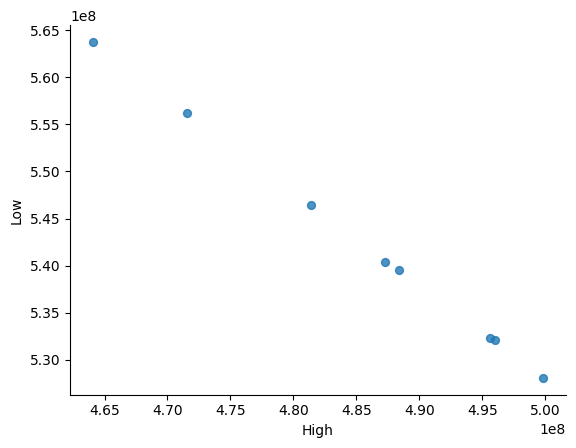

In [ ]:

averages_by_group_df.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

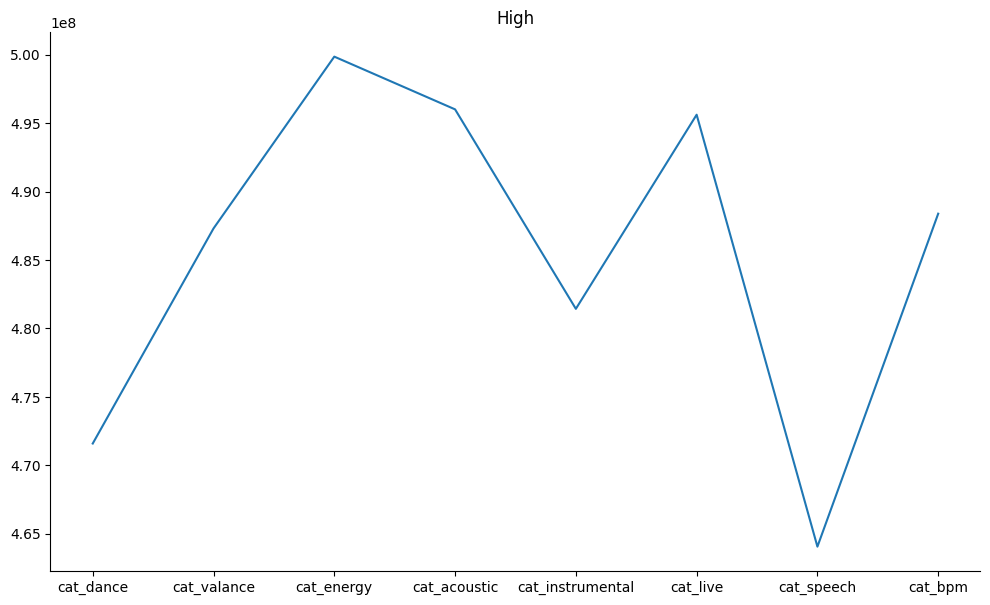

In [ ]:

averages_by_group_df['High'].plot(kind='line', figsize=(12, 7), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

Hipotesis 0 = El promedio de streams entre las  caracteristicas de la musica alto y bajo es la misma.

Hipotesis 1 = EL promedio de streams entre las caracteristicas de la musica alto y bajo es distinta.

Alfa = 0.05

#ANALISIS mannwhitney

In [ ]:
# Pruebas estadísticas

# Crear diccionarios para almacenar los resultados de las pruebas de Mann-Whitney U y la prueba T
mannwhitney_results = {}

# Aplicar las pruebas para cada grupo de cada característica
for feature in feature_columns:
    high_group = datos[datos[feature] == 'Alto'][stream_column].dropna()
    low_group = datos[datos[feature] == 'Bajo'][stream_column].dropna()

    # Prueba de Mann-Whitney U
    mw_stat, mw_p = mannwhitneyu(high_group, low_group)
    mannwhitney_results[feature] = {'statistic': mw_stat, 'p-value': mw_p}

# Convertir los resultados en DataFrames para una mejor visualización
mannwhitney_df = pd.DataFrame(mannwhitney_results).transpose()

mannwhitney_df




,statistic,p-value
cat_dance,105626.5,0.111391
cat_valance,107895.5,0.292454
cat_energy,109497.0,0.500471
cat_acoustic,105889.0,0.126178
cat_instrumental,106696.0,0.180816
cat_live,109671.0,0.527079
cat_speech,102104.0,0.015198
cat_bpm,107432.5,0.244617


si alfa 0.05 > p-value: SI existe diferencie significativa en los promedios de streams entre los grupos

si alfa 0.05 < p-value: NO  existe diferencie significativa en los promedios de streams entre los grupos

interpretacion: No  Existe una diferencia significativa en los promedios de streams entre los grupos, excepto en la caracteristica Speech, que si refleja una diferencia.

Esto podría implicar que la característica speechiness ( la cantidad de palabras habladas en una canción) tiene un impacto en cuántas veces se reproduce una canción, mientras que las otras características no parecen tener un efecto significativo.



# ANALISIS TEST t

In [ ]:
ttest_results = {}
for feature in feature_columns:
    high_group = datos[datos[feature] == 'Alto'][stream_column].dropna()
    low_group = datos[datos[feature] == 'Bajo'][stream_column].dropna()
     # Prueba T (se asume varianzas iguales para simplificar el ejemplo)
    t_stat, t_p = ttest_ind(high_group, low_group, equal_var=True)
    ttest_results[feature] = {'statistic': t_stat, 'p-value': t_p}

ttest_df = pd.DataFrame(ttest_results).transpose()
ttest_df


,statistic,p-value
cat_dance,-2.299832,0.021675
cat_valance,-1.439103,0.150452
cat_energy,-0.764997,0.444464
cat_acoustic,-0.979797,0.327437
cat_instrumental,-1.764187,0.078023
cat_live,-0.994741,0.320117
cat_speech,-2.711337,0.006823
cat_bpm,-1.386704,0.165859


si alfa 0.05 > p-value: SI existe diferencie significativa en los promedios de streams entre los grupos

si alfa 0.05 < p-value: NO existe diferencie significativa en los promedios de streams entre los grupos

interpretacion: No Existe una diferencia significativa en los promedios de streams entre los grupos, excepto en la caracteristica dance y speech, que si refleja una diferencia.

La característica speechiness se destaca en ambas pruebas (Mann-Whitney U y prueba T), lo que indica consistentemente una posible relación significativa con los streams. Por otro lado, danceability solo mostró significancia en la prueba T y no en Mann-Whitney U, lo que podría requerir un análisis más profundo para entender esta discrepancia.

In [ ]:

datos.columns


Index(['track_id', 'track_name', 'artist_name', 'artist_count', 'release_date',
       'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'bpm', 'danceability__', 'valence__', 'energy__',
       'acousticness__', 'instrumentalness__', 'liveness__', 'speechiness__',
       'total_playlist_participation', 'cuartiles_dance', 'cuartiles_valance',
       'cuartiles_energy', 'cuartiles_acoustic', 'cuartiles_instrumental',
       'cuartiles_live', 'cuartiles_speech', 'cuartiles_bpm', 'cat_dance',
       'cat_valance', 'cat_energy', 'cat_acoustic', 'cat_instrumental',
       'cat_live', 'cat_speech', 'cat_bpm'],
      dtype='object')

In [ ]:
# Definir las columnas categóricas basadas en el prefijo 'cat_'
cat_columns = [col for col in datos.columns if col.startswith('cat_')]

# Crear tablas de resumen para cada columna categórica y almacenarlas en un diccionario
summary_tables = {
    cat_col: datos.groupby(cat_col)['streams'].agg(['count', 'mean', 'median', 'max', 'min', 'std'])
    for cat_col in cat_columns
}

# Inicializar un DataFrame vacío para el resumen combinado
resumen_combinado = pd.DataFrame()

# Iterar sobre cada columna categórica y su tabla de resumen correspondiente
for cat_col, summary_df in summary_ables.items():
    # Resetear el índice para convertir los valores de la categoría en una columna
    summary_df_reset = summary_df.reset_index()
    # Renombrar la columna del índice reseteado al nombre genérico 'Valor_Categoría'
    summary_df_reset = summary_df_reset.rename(columns={cat_col: 'Valor_Categoría'})
    # Agregar la columna 'Categoría' que tendrá el nombre de la categoría actual
    summary_df_reset['Categoría'] = cat_col
    # Añadir este DataFrame de resumen al resumen combinado
    resumen_combinado = pd.concat([resumen_combinado, summary_df_reset], ignore_index=True)

# Mostrar el DataFrame combinado
resumen_combinado





,Valor_Categoría,count,mean,median,max,min,std,Categoría
0,Alto,473,4.715875e+08,273914335.0,3562543890,1365184,5.304580e+08,cat_dance
1,Bajo,475,5.562382e+08,311482393.0,3703895074,2762,6.005075e+08,cat_dance
2,Alto,471,4.873041e+08,273005485.0,3562543890,2762,5.503002e+08,cat_valance
3,Bajo,477,5.403644e+08,305650299.0,3703895074,14780425,5.841816e+08,cat_valance
4,Alto,473,4.998587e+08,271666301.0,3703895074,1365184,5.434573e+08,cat_energy
5,Bajo,475,5.280861e+08,299648208.0,3562543890,2762,5.915171e+08,cat_energy
6,Alto,476,4.960053e+08,273554509.5,3562543890,2762,5.717362e+08,cat_acoustic
7,Bajo,472,5.321516e+08,309568976.5,3703895074,1365184,5.640736e+08,cat_acoustic
8,Alto,473,4.814289e+08,279737940.0,3703895074,11956641,5.408431e+08,cat_instrumental
9,Bajo,475,5.464383e+08,301051721.0,3562543890,2762,5.924528e+08,cat_instrumental


In [ ]:
# Cambiar el indice de la columna 'Categoría'
resumen_combinado.insert(0, 'Categoría', resumen_combinado.pop('Categoría'))

# Mostrar el DataFrame con la columna 'Categoría' en la primera posición
resumen_combinado



,Categoría,Valor_Categoría,count,mean,median,max,min,std
0,cat_dance,Alto,473,4.715875e+08,273914335.0,3562543890,1365184,5.304580e+08
1,cat_dance,Bajo,475,5.562382e+08,311482393.0,3703895074,2762,6.005075e+08
2,cat_valance,Alto,471,4.873041e+08,273005485.0,3562543890,2762,5.503002e+08
3,cat_valance,Bajo,477,5.403644e+08,305650299.0,3703895074,14780425,5.841816e+08
4,cat_energy,Alto,473,4.998587e+08,271666301.0,3703895074,1365184,5.434573e+08
5,cat_energy,Bajo,475,5.280861e+08,299648208.0,3562543890,2762,5.915171e+08
6,cat_acoustic,Alto,476,4.960053e+08,273554509.5,3562543890,2762,5.717362e+08
7,cat_acoustic,Bajo,472,5.321516e+08,309568976.5,3703895074,1365184,5.640736e+08
8,cat_instrumental,Alto,473,4.814289e+08,279737940.0,3703895074,11956641,5.408431e+08
9,cat_instrumental,Bajo,475,5.464383e+08,301051721.0,3562543890,2762,5.924528e+08


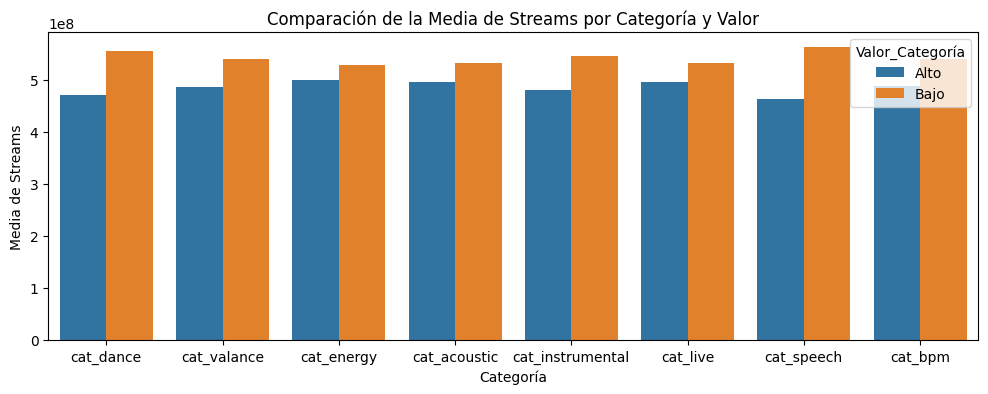

In [ ]:
# Crear una figura para el gráfico
plt.figure(figsize=(12, 4))

# Crear el gráfico de barras
sns.barplot(x='Categoría', y='mean', hue='Valor_Categoría', data=resumen_combinado)

# Añadir título y etiquetas
plt.title('Comparación de la Media de Streams por Categoría y Valor')
plt.ylabel('Media de Streams')
plt.xlabel('Categoría')

# Mostrar el gráfico
plt.show()
